In [1]:
# !pip install matplotlib

coral-app.py is a Flask app which exposes a tensorflow model as an endpoint. To run the app and expose over a network: 

 $ python3 coral-app.py

Then use curl to query:

In [2]:
# !curl -X POST -F image=@images/test-image3.jpg 'http://localhost:5000/v1/vision/detection'

In [3]:
# !curl -X POST -F image=@images/test-image3.jpg 'http://192.168.1.134:5000/v1/vision/detection'

Alternatively we can use requests

In [4]:
!ls images/

face.jpg         my_setup.png     people_car.jpg   pi4.jpg
grace_hopper.bmp parrot.jpg       pi-zero.jpg      test-image3.jpg


In [5]:
import requests

IP = "192.168.1.252" # Pi3
PREDICT_URL = f'http://{IP}:5000/v1/vision/detection'

#IMAGE_PATH = "images/test-image3.jpg"
IMAGE_PATH = "images/people_car.jpg"
#IMAGE_PATH = "images/face.jpg"

# load the input image and construct the payload for the request
image = open(IMAGE_PATH, "rb").read()
payload = {"image": image}

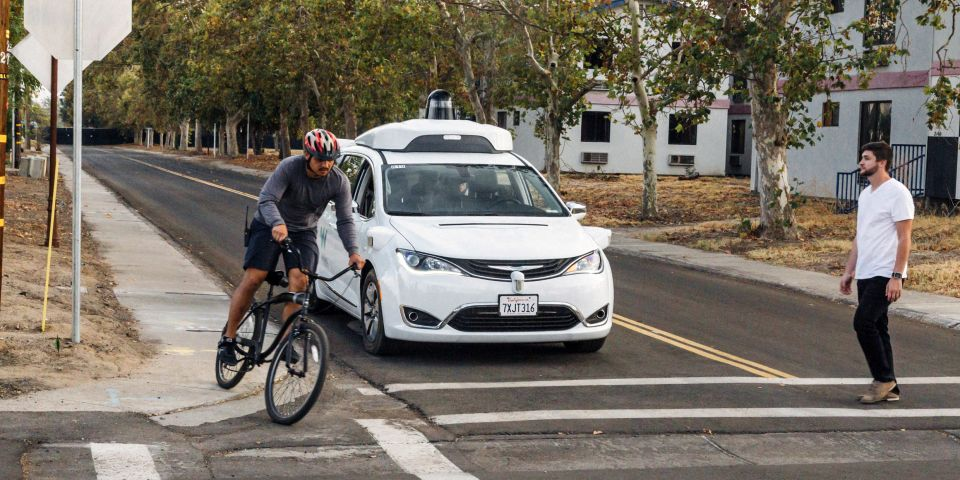

In [6]:
from IPython.display import Image
Image(IMAGE_PATH)

In [7]:
%%time
# submit the request
response = requests.post(PREDICT_URL, files=payload)

CPU times: user 8.98 ms, sys: 4.52 ms, total: 13.5 ms
Wall time: 256 ms


In [8]:
response.status_code

200

In [9]:
predictions = response.json()['predictions']

predictions

[{'confidence': 0.95703125,
  'label': 'car',
  'x_max': 220,
  'x_min': 77,
  'y_max': 194,
  'y_min': 91},
 {'confidence': 0.72265625,
  'label': 'bicycle',
  'x_max': 263,
  'x_min': 163,
  'y_max': 105,
  'y_min': 65},
 {'confidence': 0.72265625,
  'label': 'person',
  'x_max': 202,
  'x_min': 80,
  'y_max': 113,
  'y_min': 86},
 {'confidence': 0.6171875,
  'label': 'person',
  'x_max': 196,
  'x_min': 85,
  'y_max': 107,
  'y_min': 76}]

In [10]:
len(predictions)

4

## Process response

In [11]:
import helpers
CONFIDENCE = 0.50 # A threshold percentage for confidence

In [12]:
# ensure the request was successful
if response.status_code == 200:    
    # loop over the predictions and display them
    for result in predictions:
        print("{}: {}".format(result["label"], result["confidence"]))

car: 0.95703125
bicycle: 0.72265625
person: 0.72265625
person: 0.6171875


In [13]:
helpers.get_object_classes(predictions, CONFIDENCE)

{'bicycle', 'car', 'person'}

In [14]:
helpers.get_object_instances(predictions, 'person', CONFIDENCE)

2

In [15]:
helpers.get_objects_summary(predictions, CONFIDENCE)

{'person': 2, 'bicycle': 1, 'car': 1}

## Draw bounding boxes

In [16]:
from PIL import Image
from PIL import ImageDraw
%matplotlib inline

In [17]:
image = Image.open(IMAGE_PATH)  # PIL img object.
draw = ImageDraw.Draw(image)

In [18]:
image_width = image.size[0]
image_width

960

In [19]:
image_height = image.size[1]
image_height

480

Images are resized to (300, 300)

In [20]:
x_scale = image_width/300
y_scale = image_height/300

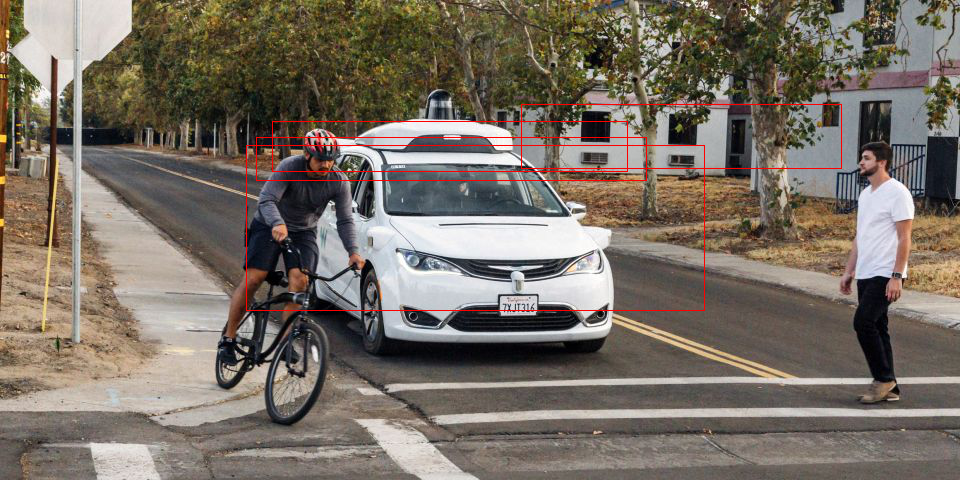

In [21]:
for predicton in predictions:
    if float(predicton["confidence"]) > CONFIDENCE:
        bounding_box = [
            int(x_scale*predicton['x_min']), 
            int(y_scale*predicton['y_min']), 
            int(x_scale*predicton['x_max']),
            int(y_scale*predicton['y_max'])
        ]
        # bounding_box = [predicton['y_min'], predicton['x_min'], predicton['y_max'], predicton['x_max']]
        draw.rectangle(bounding_box, outline='red')
        
display(image)